# 1. Install Dependencies and Setup

In [6]:
!pip install tensorflow opencv-python matplotlib

You should consider upgrading via the 'C:\Users\Admin\Desktop\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [10]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
asttokens                    2.4.1
astunparse                   1.6.3
certifi                      2024.7.4
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.2
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.53.1
gast                         0.6.0
google-pasta                 0.2.0
grpcio                       1.64.1
h5py                         3.11.0
idna                         3.7
ipykernel                    6.29.5
ipython                      8.26.0
jedi                         0.19.1
jupyter_client               8.6.2
jupyter_core                 5.7.2
keras                        3.4.1
ki

You should consider upgrading via the 'C:\Users\Admin\Desktop\ImageClassification\imageclassification\Scripts\python.exe -m pip install --upgrade pip' command.


In [8]:
!pip install  tensorflow-gpu

  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for tensorflow-gpu
Failed to build tensorflow-gpu
  Running setup.py install for tensorflow-gpu: started
  Running setup.py install for tensorflow-gpu: finished with status 'error'


  error: subprocess-exited-with-error
  
  python setup.py bdist_wheel did not run successfully.
  exit code: 1
  
  [18 lines of output]
  Traceback (most recent call last):
    File "<string>", line 2, in <module>
    File "<pip-setuptools-caller>", line 34, in <module>
    File "C:\Users\Admin\AppData\Local\Temp\pip-install-4gwfbe81\tensorflow-gpu_b452128308c6460899a2ea2c9270d00b\setup.py", line 37, in <module>
      raise Exception(TF_REMOVAL_WARNING)
  Exception:
  
  The "tensorflow-gpu" package has been removed!
  
  Please install "tensorflow" instead.
  
  Other than the name, the two packages have been identical
  since TensorFlow 2.1, or roughly since Sep 2019. For more
  information, see: pypi.org/project/tensorflow-gpu
  
  
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for tensorflow-gpu
  error: subprocess-exited-with-error
  
  Running setup.py install for tensorflow-gpu did not

In [16]:
import tensorflow as tf
import os

In [17]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [18]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [19]:
import cv2
import imghdr

In [20]:
data_dir = 'data' 

In [21]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [22]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [23]:
import numpy as np
from matplotlib import pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [25]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 305 files belonging to 2 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
batch = data_iterator.next()

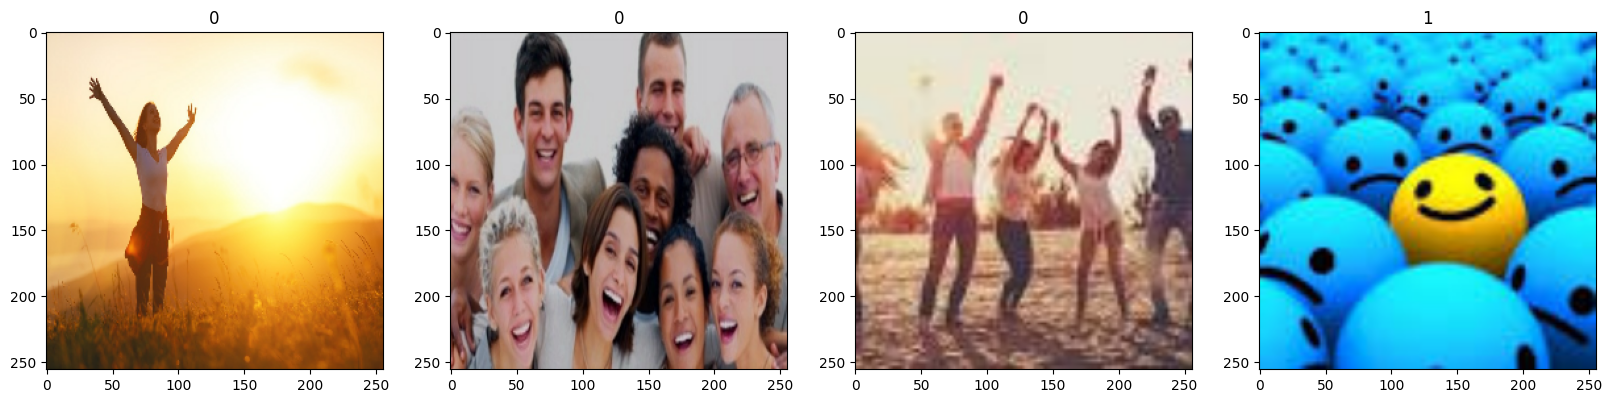

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [31]:
data = data.map(lambda x,y: (x/255, y))

In [32]:
data.as_numpy_iterator().next()

(array([[[[3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          [3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          [3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          ...,
          [1.4016244e-03, 1.1534026e-03, 1.0369809e-03],
          [1.4376682e-03, 1.1419887e-03, 1.0303730e-03],
          [1.4315408e-03, 1.1239668e-03, 1.0163159e-03]],
 
         [[3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          [3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          [3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          ...,
          [1.4016244e-03, 1.1534026e-03, 1.0369809e-03],
          [1.4266110e-03, 1.1364600e-03, 1.0248444e-03],
          [1.4302605e-03, 1.1233266e-03, 1.0156756e-03]],
 
         [[3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          [3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          [3.6755095e-03, 3.9061899e-03, 3.8600538e-03],
          ...,
          [1.3994618e-03, 1.1512398e-03, 1.0360517e-03],
          [1.4142828e-03, 1.1300172e-

# 5. Split Data

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [37]:
train_size

7

In [38]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [39]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [41]:
model = Sequential()

In [42]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\Admin\Desktop\ImageClassification\imageclassification\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [45]:
logdir='logs'

In [46]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [47]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 11s 866ms/step - accuracy: 0.5334 - loss: 0.7027 - val_accuracy: 0.6250 - val_loss: 0.6895
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 729ms/step - accuracy: 0.5182 - loss: 0.6932 - val_accuracy: 0.5156 - val_loss: 0.6922
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 597ms/step - accuracy: 0.5493 - loss: 0.6913 - val_accuracy: 0.5469 - val_loss: 0.6886
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 652ms/step - accuracy: 0.5015 - loss: 0.6922 - val_accuracy: 0.4375 - val_loss: 0.6912
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 977ms/step - accuracy: 0.5345 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6896
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 678ms/step - accuracy: 0.5905 - loss: 0.6876 - val_accuracy: 0.6250 - val_loss: 0.6918
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 587ms/step - accuracy: 0.5372 - loss: 0.6906 - val_accuracy: 0.5156 - val_loss: 0.6887
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 606ms/step - accuracy: 0.4966 - loss: 0.6905 - val_accuracy: 0.5781 - val_loss

# 8. Plot Performance

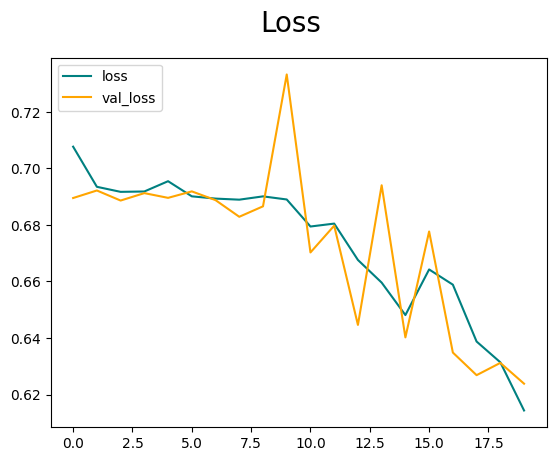

In [48]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

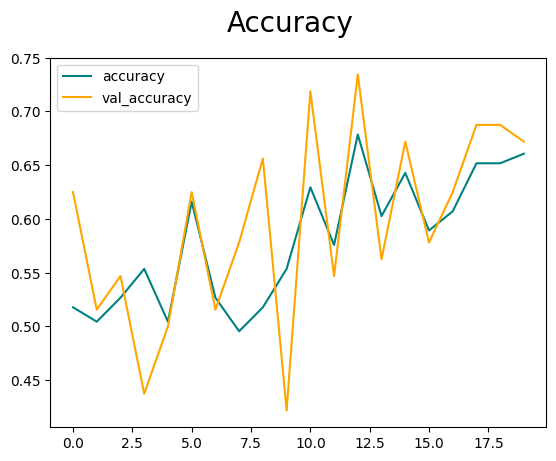

In [49]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [60]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [61]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [62]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step


In [63]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(0.22222222, shape=(), dtype=float32) tf.Tensor(0.5882353, shape=(), dtype=float32)


# 10. Test

In [64]:
import cv2

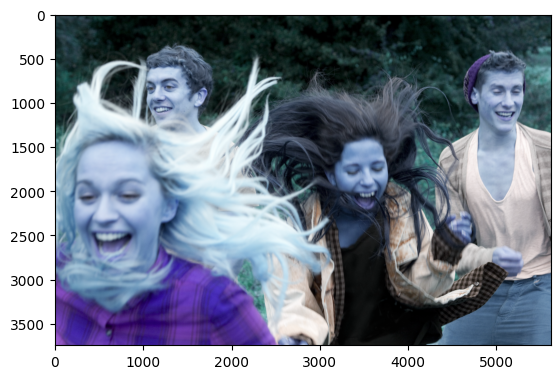

In [65]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

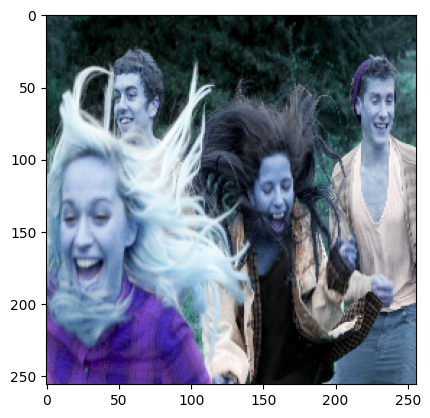

In [66]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [67]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step


In [68]:
yhat

array([[0.]], dtype=float32)

In [69]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [70]:
from tensorflow.keras.models import load_model

In [71]:
model.save(os.path.join('models','imageclassifier.h5'))

In [74]:
new_model = load_model('imageclassifier.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'imageclassifier.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [73]:
new_model.predict(np.expand_dims(resize/255, 0))

NameError: name 'new_model' is not defined